# Webtask Demo: E-commerce Shopping Cart

This notebook demonstrates automated web interaction using Webtask to add items to a shopping cart.

## 1. Setup

Install dependencies and import required libraries.

In [1]:
!pip install -e .

Obtaining file:///home/stevewang/Github/web-auto/webtask
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for webtask (pyproject.toml) ... done
  Created wheel for webtask: filename=webtask-0.1.0-0.editable-py3-none-any.whl size=2608 sha256=0ecc5d97f02cf41968e4b10fdec5f10b03dbd47e2850715a35450bc794334e0e
  Stored in directory: /tmp/pip-ephem-wheel-cache-988knr41/wheels/92/a7/c0/4dbc45136057c0034fb6a0b9b932b4e284b6c17ca90a12ba46
Successfully built webtask
  Attempting uninstall: webtask
    Found existing installation: webtask 0.1.0
    Uninstalling webtask-0.1.0:
      Successfully uninstalled webtask-0.1.0


In [2]:
from dotenv import load_dotenv
from IPython.display import Image, display

# Load environment variables from .env file
load_dotenv()

True

## 2. Initialize Webtask Agent

Create a Webtask instance and configure the LLM.

In [3]:
from webtask import Webtask
from webtask.integrations.llm.openai import OpenAILLM

wt = Webtask()
# OpenAILLM will automatically read OPENAI_API_KEY from environment
llm = OpenAILLM.create(model="gpt-4.1")

/home/stevewang/Github/web-auto/webtask/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Create agent with 2 second delay between actions to allow pages to load
agent = await wt.create_agent(llm=llm, action_delay=2.0)

## 3. Initial State

Navigate to the website and capture the starting state.

Screenshot BEFORE task execution:


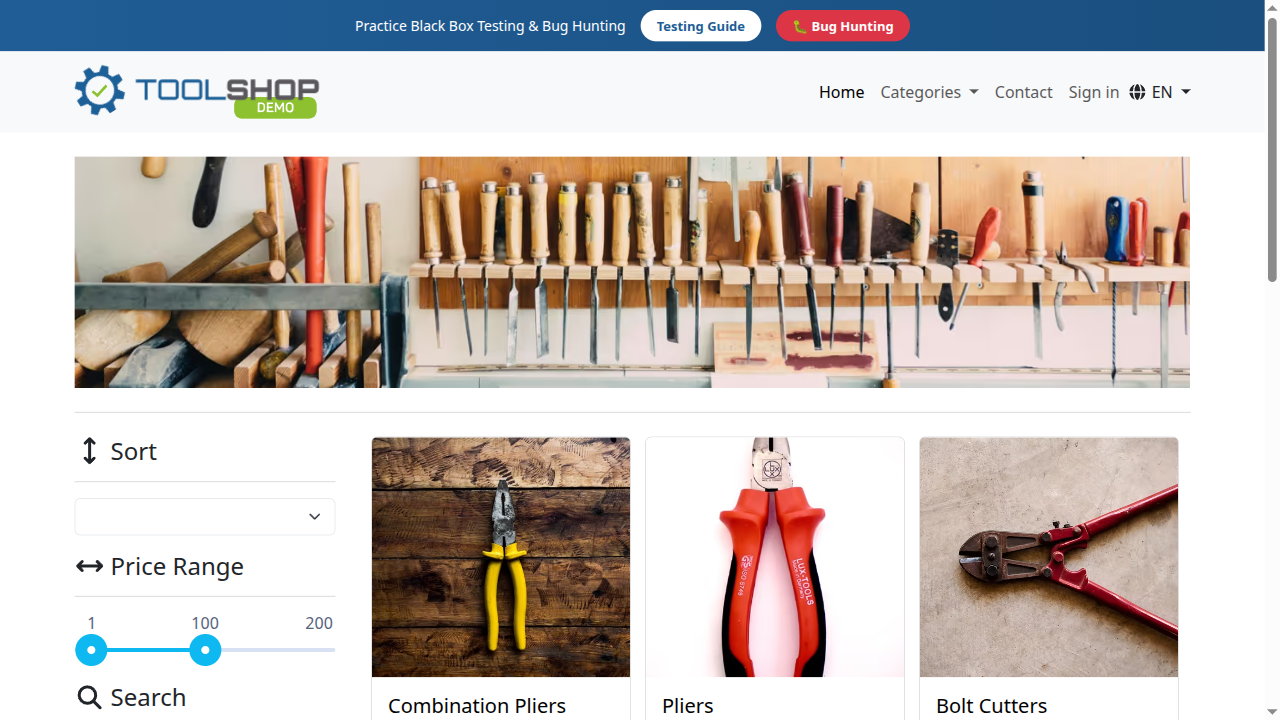

In [5]:
# Navigate to the starting page first
await agent.navigate("https://practicesoftwaretesting.com/")
await agent.wait_for_idle()

# Take screenshot before starting the task
print("Screenshot BEFORE task execution:")
await agent.screenshot("before_task.png")
display(Image(filename="before_task.png", width=800))

## 4. Execute Task

Run the agent to add items to the shopping cart.

In [ ]:
# Execute the task step by step
agent.set_task("add 2 Flat-Head Wood Screws and 5 cross-head screws to the cart, and proceed to checkout page")

max_steps = 10
for i in range(max_steps):
    print(f"\n=== Executing Step {i+1} ===")
    step = await agent.run_step()

    print(f"Proposals: {len(step.proposals)}")
    for j, action in enumerate(step.proposals, 1):
        print(f"  Action {j}: {action.tool_name} - {action.reason}")

    print(f"Verification: {'Complete' if step.verification.complete else 'Incomplete'}")
    print(f"Message: {step.verification.message}")

    if step.verification.complete:
        print(f"\n✓ Task completed in {i+1} steps!")
        break
else:
    print(f"\n✗ Task not completed after {max_steps} steps")


=== Executing Step 1 ===
Proposals: 2
  Action 1: type - To find screws, first search for 'screw' using the search input. This should display Flat-Head Wood Screws and Cross-Head Screws in the results.
  Action 2: click - Submit the search to view products matching the term 'screw', which should include the items required.
Verification: Incomplete
Message: The task is not yet complete. So far, only the search for 'screw' has been performed, and the results page is now displaying both 'Flat-Head Wood Screws' and 'Cross-head screws' among other items. However, neither adding 2 Flat-Head Wood Screws and 5 Cross-head screws to the cart, nor proceeding to the checkout page, has been done yet. These actions must still be completed to fulfill the task requirements.

=== Executing Step 2 ===
Proposals: 2
  Action 1: click - Navigate to the Flat-Head Wood Screws product page to add the correct quantity to the cart.
  Action 2: click - Navigate to the Cross-head screws product page to add the c

## 5. Final State

Capture the final state after task completion.

Screenshot AFTER task execution:


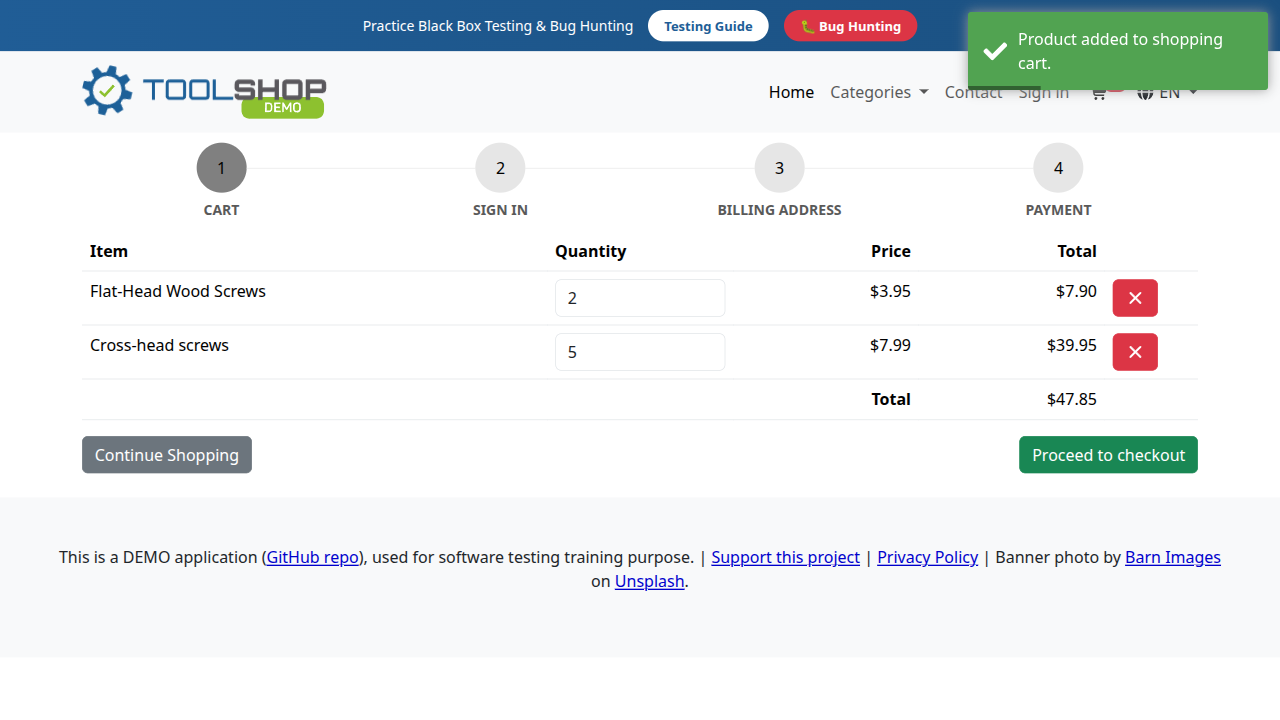

In [7]:
# Take screenshot after task completion
print("Screenshot AFTER task execution:")
await agent.screenshot("after_task.png")
display(Image(filename="after_task.png", width=800))